# Data Analysis and Machine Learning Project


### Part 1:
Project Contents:
- Introduction
- Data Importing, Exploring and Cleaning
- Data Visualisation
- Final cleaning before modelling



### Introduction 

I will be exploring used-car data taken from Kaggle. I will be exploring certain trends with in the data. Then, using machine learning modelling, I'll try to predict a car price for a certain model of car, based on various features. 

Some questions I'll be exploring during the first part of the project:
- Does location impact the price?
- What are the biggest features that impact in price?
- Is there a correlation between car condition and odometer? 

# Data Importing, Exploring and Cleaning
### Data Importing

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [176]:
#Importing Data
df = pd.read_csv("vehicles.csv")

### Exploring

In [177]:
#Checking what columns the data has 
df.columns.values

array(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size',
       'type', 'paint_color', 'image_url', 'description', 'state', 'lat',
       'long', 'posting_date'], dtype=object)

Loking to see what models are popular. I'm going to explore Ford f-150, as I want to be able to predict the price for a certain model, based on various features.

In [178]:
df["model"].value_counts()

f-150                       8370
silverado 1500              5964
1500                        4211
camry                       4033
accord                      3730
                            ... 
fpace 35t prestige             1
velar s                        1
impreza 2.0i sport hatch       1
rc 350 f-sport awd             1
Benz C240 4 matic              1
Name: model, Length: 31520, dtype: int64

In [179]:
#Splitting ford data
df_ford = df[df["manufacturer"] == "ford"] 

In [180]:
#Just taking the f-150 models
df_f150 = df[df["model"] == "f-150"]

In [181]:
#Checking what columns the data has
df_f150.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 20 to 458011
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8370 non-null   int64  
 1   id            8370 non-null   int64  
 2   url           8370 non-null   object 
 3   region        8370 non-null   object 
 4   region_url    8370 non-null   object 
 5   price         8370 non-null   int64  
 6   year          8370 non-null   float64
 7   manufacturer  8370 non-null   object 
 8   model         8370 non-null   object 
 9   condition     3483 non-null   object 
 10  cylinders     4705 non-null   object 
 11  fuel          8315 non-null   object 
 12  odometer      7400 non-null   float64
 13  title_status  8356 non-null   object 
 14  transmission  8314 non-null   object 
 15  VIN           5739 non-null   object 
 16  drive         6968 non-null   object 
 17  size          2595 non-null   object 
 18  type          6500 non-nu

### Data Cleaning

Based on the questions in the introduction. I will be focusing on the following columns:
- region / price / year / condition / cylinders / odomter / transmission / drive
- Will keep posting date in too, to possibly explore recent trends later on and if Covid has impacted price

All other columns will be dropped in the cleaning stage. As you can see from the null values below. Condition has 4887 null values, half of the data. I will make a seperate df for dropping null values for conditions, so I have a lot of data to explore other trends and model later on.


In [182]:
df_f150.isnull().sum()

Unnamed: 0         0
id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
condition       4887
cylinders       3665
fuel              55
odometer         970
title_status      14
transmission      56
VIN             2631
drive           1402
size            5775
type            1870
paint_color     2757
image_url          0
description        1
state              0
lat              267
long             267
posting_date       0
dtype: int64

In [183]:
df_f150.drop(["id", "url", "region_url", "title_status", "VIN", "type", "paint_color", "image_url", 
              "description", "lat", "long", "model", "manufacturer"
               ], axis = 1, inplace = True)

C:\Users\ellio\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [184]:
#Dropping null values
df_condition = df_f150.dropna()

In [185]:
df_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 261 to 457959
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1834 non-null   int64  
 1   region        1834 non-null   object 
 2   price         1834 non-null   int64  
 3   year          1834 non-null   float64
 4   condition     1834 non-null   object 
 5   cylinders     1834 non-null   object 
 6   fuel          1834 non-null   object 
 7   odometer      1834 non-null   float64
 8   transmission  1834 non-null   object 
 9   drive         1834 non-null   object 
 10  size          1834 non-null   object 
 11  state         1834 non-null   object 
 12  posting_date  1834 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 200.6+ KB


I'm going to use 2 clean datasets, as a lot of the null values are for condition and size. For modelling later, it's unlikely I will need these columns. So df_condition will be the cleaned data set including condition and size. Then the second dataaset, df_clean, will drop these two columns so the sample will be bigger.

In [186]:
df_clean = df_f150.drop(["condition", "size", "cylinders"], axis = 1)

In [187]:
df_clean.dropna(inplace = True)

In [188]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6333 entries, 107 to 458011
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6333 non-null   int64  
 1   region        6333 non-null   object 
 2   price         6333 non-null   int64  
 3   year          6333 non-null   float64
 4   fuel          6333 non-null   object 
 5   odometer      6333 non-null   float64
 6   transmission  6333 non-null   object 
 7   drive         6333 non-null   object 
 8   state         6333 non-null   object 
 9   posting_date  6333 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 544.2+ KB


In [189]:
#Going to only take cars in the last 10 years
df_clean = df_clean[df_clean["year"] > 2010]
df_condition = df_condition[df_condition["year"] > 2010]

In [190]:
df_clean.shape, df_condition.shape

((4924, 10), (1124, 13))

In [191]:
#Saving df's to csv
df_clean.to_csv("f150_clean.csv")
df_f150.to_csv("df150.csv")
df_condition.to_csv("f150_condtion_clean.csv")

# Data Visualisation

A reminder of questions posted in introduction:
- Does the location impact the price?
- What are the biggest features that impact in price?
- Is there a correlation between car condition and odometer? 





In [192]:
#Will take top 10 States for looking at location and price
df_clean["state"].value_counts().head(10)

wa    447
ca    318
or    307
fl    285
tx    272
mt    254
mi    236
oh    199
id    194
co    179
Name: state, dtype: int64

In [193]:
#Top 10 States
states = ["wa", "ca", "fl", "or", "tx", "mi", "mt", "oh", "co", "id"]    

In [194]:
#New df for states top 10 states
df_state = df_clean.loc[df_clean["state"].isin(states)]

In [195]:
df_state.shape

(2691, 10)

C:\Users\ellio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


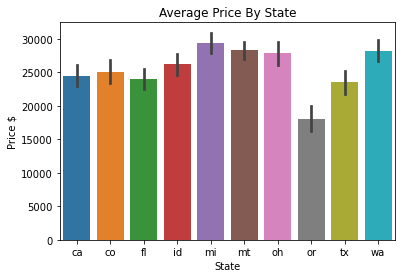

In [196]:
state_bar = sns.barplot(df_state["state"], df_state["price"])
state_bar.set_title("Average Price By State");
state_bar.set_xlabel("State");
state_bar.set_ylabel("Price $");
plt.show();

There is a few of the top 10 States that are varying. However, there are a lot of variables that can impact the price. I'll look into the year of the cars to see if that's causing the range of prices in each State.

In [197]:
# Taking WA state to look at model year
df_wa = df_state[df_state["state"] == "wa"]

In [198]:
df_wa["year"].value_counts()

2018.0    135
2017.0     94
2013.0     45
2019.0     43
2012.0     38
2015.0     29
2014.0     21
2020.0     18
2016.0     17
2011.0      7
Name: year, dtype: int64

In [199]:
#Taking ID as it was by far the lowest state on the list
df_id = df_state[df_state["state"] == "id"]

In [200]:
df_id["year"].value_counts()

2013.0    41
2017.0    32
2018.0    27
2015.0    21
2014.0    21
2020.0    15
2016.0    14
2012.0    13
2011.0     7
2019.0     3
Name: year, dtype: int64

The lowest price was for ID, from above, we can see that it is just the model's year that is most likely causing the difference and doesn't have much correlation to the State.

In [201]:
#Grouping by year to explore some price trends
df_year = df_clean.groupby("year").mean()

In [202]:
df_year

,Unnamed: 0,price,odometer
year,,,
2011.0,250564.602649,14876.943709,131577.225166
2012.0,227804.994186,16712.258721,129319.273256
2013.0,248506.986111,17443.209877,119985.924383
2014.0,234916.906606,19403.635535,109886.239180
2015.0,241258.084746,21727.307203,90069.775424
2016.0,235871.521352,23576.587189,77094.080071
2017.0,249203.048493,26548.853211,58904.934469
2018.0,263070.325607,27578.550773,44956.985651
2019.0,251713.830729,31868.708333,21987.059896


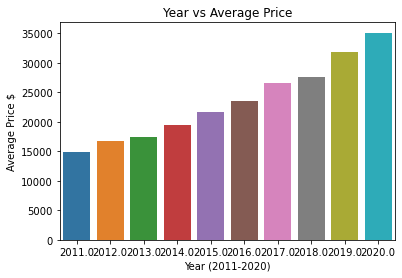

In [203]:
df_year.reset_index(inplace = True)
year_bar = sns.barplot(x = "year", y = "price", data = df_year)
year_bar.set_title("Year vs Average Price")
year_bar.set_xlabel("Year (2011-2020)")
year_bar.set_ylabel("Average Price $")
plt.show();


As expected there is a clear correlation between model year and price. I will now look into the car conditions, before modelling a price predictor.

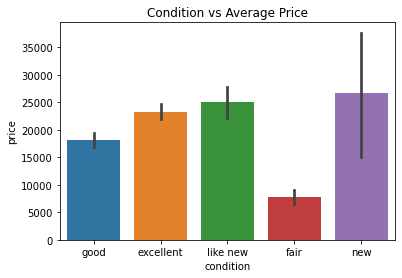

In [204]:
condition_bar = sns.barplot(x = "condition", y = "price", data = df_condition)
condition_bar.set_title("Condition vs Average Price")
year_bar.set_ylabel("Average $")
year_bar.set_xlabel("Condition")
plt.show();


As expected, the condition is a big factor for how much the car sells for. I'll now look into some odometer data, then move on to some modelling to try and predict prices.

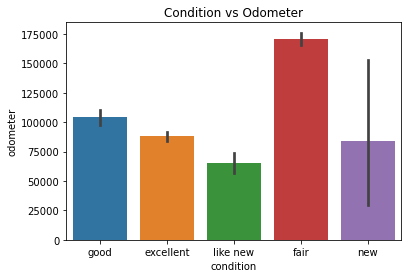

In [205]:
condition_odo_bar = sns.barplot(x = "condition", y = "odometer", data = df_condition)
condition_odo_bar.set_title("Condition vs Odometer")
year_bar.set_ylabel("Odometer")
year_bar.set_xlabel("Condition")
plt.show();

This part was mostly to clean the data for the modelling in part two. It contained some exploration and visualisation. The main part of this project was the modelling, so there was no main goal in this visualisation part. I only explored some obvious correlations.  

I will now do a final cleaning to prepare the data for modelling. Dropping all columns except: price, year, odometer and condition.
Condiiton will need to be converted from categorical. I'll use pandas get_dummies for this.

In [206]:
df_condition.columns

Index(['Unnamed: 0', 'region', 'price', 'year', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'state',
       'posting_date'],
      dtype='object')

In [207]:
df_clean_model = df_condition.drop(["region", "fuel", "cylinders", "transmission", "drive", "size", 
                                    "state", "posting_date"], axis = 1)

In [208]:
df_clean_model = pd.get_dummies(df_clean_model)

In [209]:
df_clean_model.head(5)

,Unnamed: 0,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new
396,396,34900,2015.0,87405.0,0,0,1,0,0
399,399,37900,2016.0,51615.0,0,0,1,0,0
401,401,21900,2015.0,110602.0,0,0,1,0,0
498,498,10995,2012.0,175749.0,1,0,0,0,0
1080,1080,19990,2013.0,174623.0,0,0,1,0,0


In [210]:
df_clean_model = df_clean_model.rename(columns= {"condition_excellent":"excellent", "condition_fair":"fair",
                                                "condition_good":"good", "condition_like new": "like_new",
                                                "condition_new":"new"})

In [211]:
df_clean_model.to_csv("df_clean_model.csv")